# (K) Nearest Neighbours - Crimes Dataset

https://scikit-activeml.github.io/scikit-activeml-docs/generated/api/skactiveml.visualization.plot_decision_boundary.html
https://github.com/scikit-activeml/scikit-activeml
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
http://localhost:8888/notebooks/OneDrive/AY2022%20Y3S2%20Exchange/Machine%20Learning%201/Practicals/Practical%206/P6.ipynb

## Importing packages and loading necessary dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.model_selection import train_test_split, GridSearchCV, GroupKFold
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotting
import skactiveml.visualization as skactive
from skactiveml.visualization import plot_decision_boundary
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Change to the parent directory
os.chdir(parent_dir)

# Print the new current working directory to confirm
print("Changed to:", os.getcwd())

Changed to: C:\Users\chloe\OneDrive\AY2024 FYP\FYP-Code\FYP-Spatial-Analytics


In [3]:
crimes_df = pd.read_csv("Data/crimes_processed_vehicle.csv")

In [4]:
crimes_df

Latitude  Longitude  Community Area  n  location_id
0      41.644590 -87.615880              54  1            1
1      41.647037 -87.616647              54  1            2
2      41.647039 -87.616098              54  2            3
3      41.647180 -87.544241              55  1            4
4      41.647716 -87.542811              55  1            5
...          ...        ...             ... ..          ...
25463  42.022526 -87.672401               1  1        25464
25464  42.022529 -87.666324               1  1        25465
25465  42.022535 -87.673398               1  2        25466
25466  42.022536 -87.673711               1  1        25467
25467  42.022548 -87.676139               1  1        25468

[25468 rows x 5 columns]

In [6]:
crimes_df.describe()

Latitude     Longitude  Community Area             n   location_id
count  25468.000000  25468.000000    25468.000000  25468.000000  25468.000000
mean      41.838827    -87.668291       37.738221      1.217135  12734.500000
std        0.088458      0.058707       21.128125      0.912026   7352.122664
min       41.644590    -87.915105        1.000000      1.000000      1.000000
25%       41.763625    -87.710013       23.000000      1.000000   6367.750000
50%       41.846616    -87.665166       34.000000      1.000000  12734.500000
75%       41.906678    -87.625776       55.000000      1.000000  19101.250000
max       42.022548    -87.525270       77.000000     31.000000  25468.000000

# Crimes Dataset

## Splitting Data

First, we will be splitting the data into training and test datsaset. Whereby the training data is used to train the model and conduct cross validation, while the test data is used to evaluate the performance of the trained model obtained from the training data. 

In [6]:
# Convert columns to numpy arrays
observed_location_columns_crimes = ['Longitude','Latitude', 'Community Area']
observed_values_column_crimes = 'n'
observed_locations_crimes = crimes_df[observed_location_columns_crimes].values
observed_values_crimes = crimes_df[observed_values_column_crimes].values

X_train_meuse and y_train_meuse are the training data whereby X_train_meuse contains the spatial information i.e Data Coordinates and the y_train_meuse will be sampled values of each data coordinates in X_train_meuse. The same is done for the test data. 

In [7]:
X_train_crimes, X_test_crimes, y_train_crimes, y_test_crimes = train_test_split(observed_locations_crimes,
                                                                            observed_values_crimes, test_size=0.2, random_state=0)
print(f"X_train_crimes.shape: {X_train_crimes.shape}")
print(f"X_test_crimes.shape:  {X_test_crimes.shape}")
print(f"y_train_crimes.shape: {y_train_crimes.shape}")
print(f"y_test_crimes.shape:  {y_test_crimes.shape}")

X_train_crimes.shape: (20374, 3)
X_test_crimes.shape:  (5094, 3)
y_train_crimes.shape: (20374,)
y_test_crimes.shape:  (5094,)


## Understanding distribution of clusters in train and test sets 

In [7]:
x_values = [element[0] for element in X_train_crimes]
y_values = [element[1] for element in X_train_crimes]
cluster_values = [element[2] for element in X_train_crimes]

data = {
    'x': x_values,
    'y': y_values,
    'cluster_num': cluster_values
}

train_df = pd.DataFrame(data)
train_df['cluster_num'] = train_df['cluster_num'].astype('category')

x_values_test = [element[0] for element in X_test_crimes]
y_values_test = [element[1] for element in X_test_crimes]
cluster_values_test = [element[2] for element in X_test_crimes]

data_test  = {
    'x': x_values_test,
    'y': y_values_test,
    'cluster_num': cluster_values_test
}

test_df = pd.DataFrame(data_test)
test_df['cluster_num'] = test_df['cluster_num'].astype('category')

In [8]:
train_df.describe(include='all')

x             y  cluster_num
count   20374.000000  20374.000000      20374.0
unique           NaN           NaN         77.0
top              NaN           NaN         25.0
freq             NaN           NaN       1040.0
mean       41.838820    -87.668161          NaN
std         0.088524      0.058705          NaN
min        41.644590    -87.915105          NaN
25%        41.763552    -87.709835          NaN
50%        41.846372    -87.665208          NaN
75%        41.906646    -87.625739          NaN
max        42.022536    -87.525748          NaN

<Axes: >

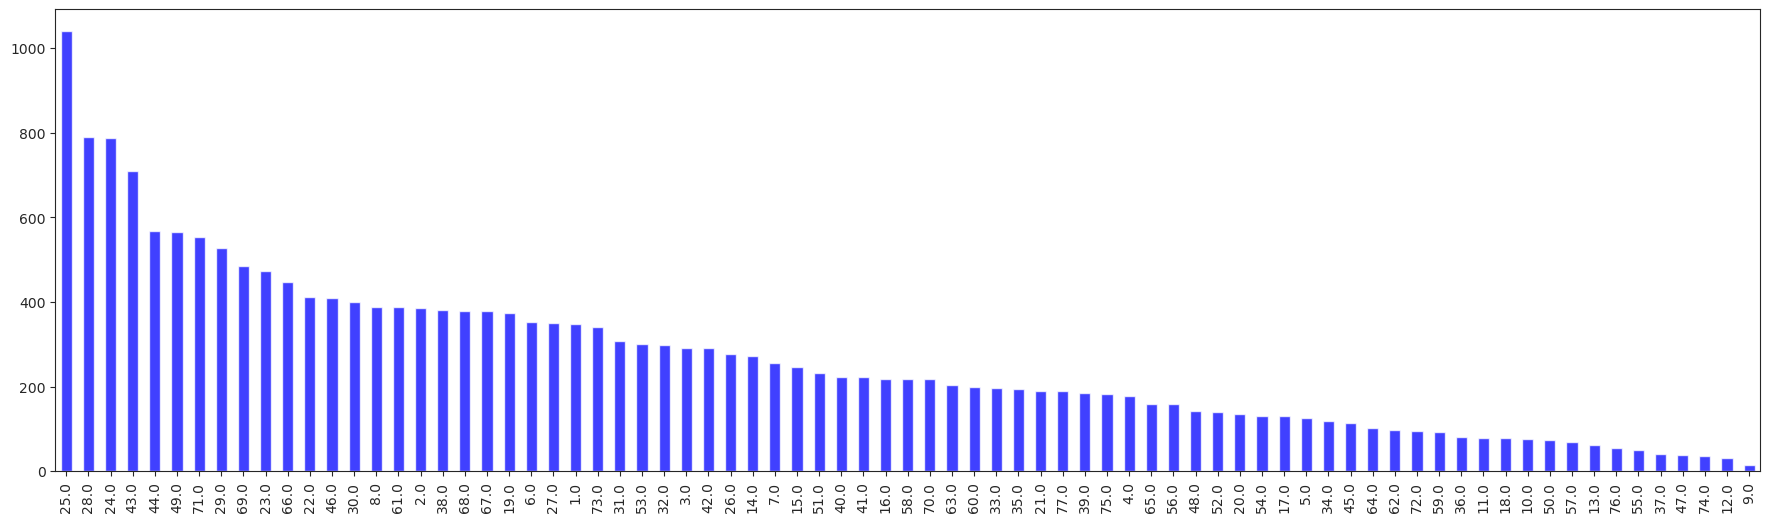

In [9]:
# Count the occurrences of each category
category_counts = train_df['cluster_num'].value_counts()

# Plotting
category_counts.plot(kind='bar', alpha=0.75, color='blue', figsize=(22, 6))

In [10]:
test_df.describe(include='all')

x            y  cluster_num
count   5094.000000  5094.000000       5094.0
unique          NaN          NaN         77.0
top             NaN          NaN         25.0
freq            NaN          NaN        278.0
mean      41.838853   -87.668812          NaN
std        0.088203     0.058717          NaN
min       41.647716   -87.906547          NaN
25%       41.764212   -87.710435          NaN
50%       41.847612   -87.665034          NaN
75%       41.907087   -87.625856          NaN
max       42.022548   -87.525270          NaN

<Axes: >

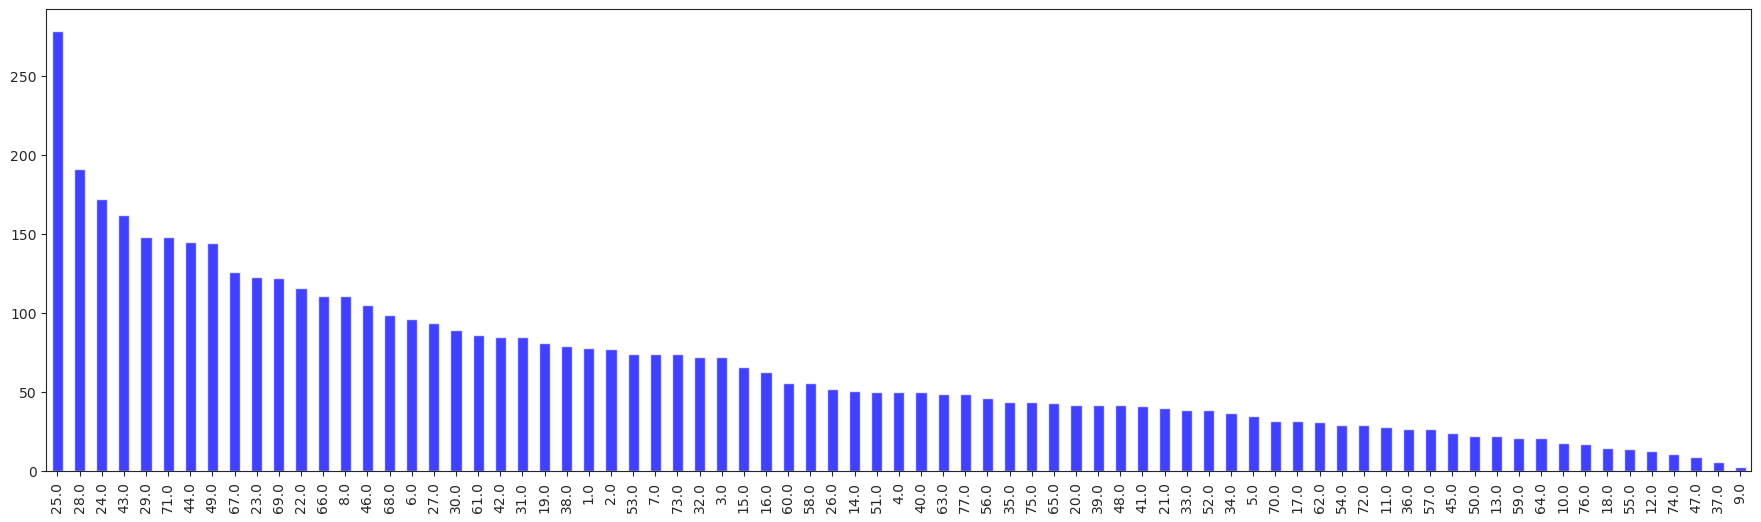

In [11]:
# Count the occurrences of each category
category_counts = test_df['cluster_num'].value_counts()

# Plotting
category_counts.plot(kind='bar', alpha=0.75, color='blue', figsize=(22, 6))

## Spatial K-Fold Cross Validation

Now we will train and cross validate the model using the training data. GridSearchCV is used whereby we pass in the model we will be using (K Nearest Nieghbours AKA KNeighborsRegressor()), along with the list of hyperparameters we would like to tune, it would then conduct K-Fold Cross validation and return the model with best hyperparamter configuration. It can also return the mean cross validation score of the best model it has found. In our approach, we will use 1 scoring metric/method for the namely Mean Absolute Percentage Error to determine how the best hyperparamter configuration can be determined. i.e GridSearchCV will score each K-Fold of cross validation for each hyperparameter configuration using this metric, and return us the model with the best hyperparameter configuration or with the lowest Mean Absolute Percentage Error it has seen.

However, I have also included other scoring metrics such as RMSE and MAE, as GridSearchCV is able to conduct multi-metric evaluation as well. By doing so, we can obtain the scores obtained for each of these metrics as well and conduct further analysis. The computational time is also calculated as it can be useful for comparison across the different spatial interpolation methods later on.

https://scikit-learn.org/stable/modules/cross_validation.html#leave-one-out-loo (Reason why K-Fold preferred)

In [8]:
x_values = [element[0] for element in X_train_crimes]
y_values = [element[1] for element in X_train_crimes]
cluster_values = [element[2] for element in X_train_crimes]

In [9]:
group_kfold = GroupKFold(n_splits = 5) 
# Generator for the train/test indices
cluster_kfold = group_kfold.split(x_values,y_values,cluster_values)  
train_indices, test_indices = [list(traintest) for traintest in zip(*cluster_kfold)]
spatial_cv = [*zip(train_indices,test_indices)]

## Spatial K-Fold Cross Validation

In [10]:
# Define the range of n_neighbors for hyperparameter tuning
neighbors_range = range(100, 161, 3)
nn_model = KNeighborsRegressor()
parameters = [
    {'n_neighbors': neighbors_range}
]

scoring_methods = ['neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error','r2']
clf = GridSearchCV(cv= spatial_cv, estimator = nn_model, param_grid = parameters, return_train_score=True, scoring= scoring_methods, refit = 'neg_mean_absolute_percentage_error')

start_time = time.time()

clf.fit(X_train_crimes, y_train_crimes)

end_time = time.time()

print(f"Training Computation Time: {end_time - start_time:.2f} seconds")

Training Computation Time: 55.38 seconds


## Hyperparameter selection

Here, we can understand how GridSearch CV came to the conclusion of which hyperparameter configuration would provide the best model by analysing the cv_results_, which is a dataframe of the training and cross validated scores it has obtained in the process.

In [15]:
cv_results_df = pd.DataFrame(clf.cv_results_)
display(cv_results_df)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.010204      0.002638         0.080617        0.006529   
1        0.009593      0.002230         0.087101        0.008895   
2        0.008808      0.001178         0.090202        0.007683   
3        0.009199      0.001939         0.095420        0.006627   
4        0.008193      0.000404         0.090203        0.007786   
5        0.010196      0.001167         0.097199        0.005531   
6        0.007801      0.000399         0.085994        0.002968   
7        0.008406      0.000797         0.088806        0.002929   
8        0.007607      0.000480         0.093811        0.005639   
9        0.007601      0.000488         0.094737        0.004611   
10       0.008204      0.000991         0.097815        0.004427   
11       0.009598      0.003201         0.101102        0.006688   
12       0.009198      0.000981         0.117005        0.004816   
13       0.008600      0.000490         0.112001        0.008415   
14       0.008006      0.000013         0.111013        0.006868   
15       0.009404      0.002797         0.111298        0.004988   
16       0.008599      0.000800         0.118802        0.008519   
17       0.007999      0.000001         0.114407        0.007091   
18       0.009199      0.001470         0.120813        0.004011   
19       0.009199      0.002400         0.128001        0.011644   
20       0.008798      0.000749         0.144252        0.024961   

   param_n_neighbors                params  \
0                100  {'n_neighbors': 100}   
1                103  {'n_neighbors': 103}   
2                106  {'n_neighbors': 106}   
3                109  {'n_neighbors': 109}   
4                112  {'n_neighbors': 112}   
5                115  {'n_neighbors': 115}   
6                118  {'n_neighbors': 118}   
7                121  {'n_neighbors': 121}   
8                124  {'n_neighbors': 124}   
9                127  {'n_neighbors': 127}   
10               130  {'n_neighbors': 130}   
11               133  {'n_neighbors': 133}   
12               136  {'n_neighbors': 136}   
13               139  {'n_neighbors': 139}   
14               142  {'n_neighbors': 142}   
15               145  {'n_neighbors': 145}   
16               148  {'n_neighbors': 148}   
17               151  {'n_neighbors': 151}   
18               154  {'n_neighbors': 154}   
19               157  {'n_neighbors': 157}   
20               160  {'n_neighbors': 160}   

    split0_test_neg_mean_absolute_percentage_error  \
0                                        -0.233202   
1                                        -0.232288   
2                                        -0.230771   
3                                        -0.231151   
4                                        -0.232272   
5                                        -0.231883   
6                                        -0.232367   
7                                        -0.233038   
8                                        -0.232378   
9                                        -0.233094   
10                                       -0.235152   
11                                       -0.234886   
12                                       -0.234203   
13                                       -0.233638   
14                                       -0.232807   
15                                       -0.232071   
16                                       -0.231669   
17                                       -0.231466   
18                                       -0.231236   
19                                       -0.230872   
20                                       -0.230670   

    split1_test_neg_mean_absolute_percentage_error  \
0                                        -0.277367   
1                                        -0.277215   
2                                        -0.278119   
3                                        -0.277399   
4                                  

In [16]:
print(f"Dataset: {clf.best_params_}")
print(f"Mean Cross-Validated Score of Best Estimator (Mean Absolute Percentage Error): {-clf.best_score_}")
columns = ['param_n_neighbors','mean_test_neg_mean_absolute_percentage_error','rank_test_neg_mean_absolute_percentage_error',
           'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error',
            'mean_test_neg_root_mean_squared_error', 'rank_test_neg_root_mean_squared_error', 'mean_test_r2', 'rank_test_r2']
filter_df = cv_results_df[columns]
display(filter_df)

Dataset: {'n_neighbors': 118}
Mean Cross-Validated Score of Best Estimator (Mean Absolute Percentage Error): 0.23501805029164324


param_n_neighbors  mean_test_neg_mean_absolute_percentage_error  \
0                100                                     -0.236482   
1                103                                     -0.236115   
2                106                                     -0.235436   
3                109                                     -0.235134   
4                112                                     -0.235060   
5                115                                     -0.235128   
6                118                                     -0.235018   
7                121                                     -0.235256   
8                124                                     -0.235084   
9                127                                     -0.235450   
10               130                                     -0.235834   
11               133                                     -0.236396   
12               136                                     -0.236323   
13               139                                     -0.236072   
14               142                                     -0.236114   
15               145                                     -0.236277   
16               148                                     -0.236686   
17               151                                     -0.237075   
18               154                                     -0.237315   
19               157                                     -0.237523   
20               160                                     -0.237751   

    rank_test_neg_mean_absolute_percentage_error  \
0                                             16   
1                                             12   
2                                              7   
3                                              5   
4                                              2   
5                                              4   
6                                              1   
7                                              6   
8                                              3   
9                                              8   
10                                             9   
11                                            15   
12                                            14   
13                                            10   
14                                            11   
15                                            13   
16                                            17   
17                                            18   
18                                            19   
19                                            20   
20                                            21   

    mean_test_neg_mean_absolute_error  rank_test_neg_mean_absolute_error  \
0                           -0.364725                                 16   
1                           -0.364393                                 11   
2                           -0.363740                                  7   
3                           -0.363480                                  4   
4                           -0.363451                                  2   
5                           -0.363543                                  5   
6                           -0.363428                                  1   
7                           -0.363648                                  6   
8                           -0.363465                                  3   
9                           -0.363797                                  8   
10                          -0.364170                                  9   
11                          -0.364694                                 15   
12                          -0.364626                                 14   
13                          -0.364363                                 10   
14                          -0.364412                                 12   
15                          -0.364534                                 13   
16                       

In [17]:
rank_columns = ['param_n_neighbors','rank_test_neg_mean_absolute_percentage_error',
                'rank_test_neg_mean_absolute_error','rank_test_neg_root_mean_squared_error', 'rank_test_r2']
rank_df = cv_results_df[rank_columns]
display(rank_df.T)

0    1    2    3    4    5   \
param_n_neighbors                             100  103  106  109  112  115   
rank_test_neg_mean_absolute_percentage_error   16   12    7    5    2    4   
rank_test_neg_mean_absolute_error              16   11    7    4    2    5   
rank_test_neg_root_mean_squared_error          21   20   19   18   17   16   
rank_test_r2                                   21   20   19   18   17   16   

                                               6    7    8    9   ...   11  \
param_n_neighbors                             118  121  124  127  ...  133   
rank_test_neg_mean_absolute_percentage_error    1    6    3    8  ...   15   
rank_test_neg_mean_absolute_error               1    6    3    8  ...   15   
rank_test_neg_root_mean_squared_error          15   14   13   12  ...   10   
rank_test_r2                                   15   14   13   12  ...   10   

                                               12   13   14   15   16   17  \
param_n_neighbors                             136  139  142  145  148  151   
rank_test_neg_mean_absolute_percentage_error   14   10   11   13   17   18   
rank_test_neg_mean_absolute_error              14   10   12   13   17   18   
rank_test_neg_root_mean_squared_error           9    8    7    6    5    4   
rank_test_r2                                    9    8    7    6    5    4   

                                               18   19   20  
param_n_neighbors                             154  157  160  
rank_test_neg_mean_absolute_percentage_error   19   20   21  
rank_test_neg_mean_absolute_error              19   20   21  
rank_test_neg_root_mean_squared_error           3    2    1  
rank_test_r2                                    3    2    1  

[5 rows x 21 columns]

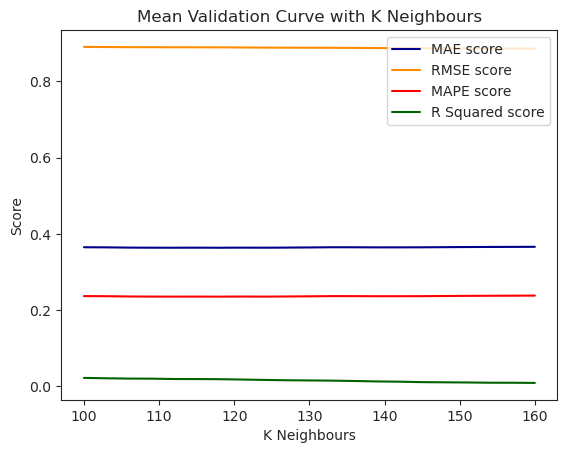

In [19]:
plt.plot(neighbors_range, -cv_results_df["mean_test_neg_mean_absolute_error"], color='darkblue', label='MAE score')
plt.plot(neighbors_range, -cv_results_df["mean_test_neg_root_mean_squared_error"], color='darkorange', label='RMSE score')
plt.plot(neighbors_range, -cv_results_df["mean_test_neg_mean_absolute_percentage_error"], color='red', label='MAPE score')
plt.plot(neighbors_range, -cv_results_df["mean_test_r2"], color='darkgreen', label='R Squared score')

plt.xlabel('K Neighbours')
plt.ylabel('Score')
#plt.yscale('log')
plt.legend()
plt.title("Mean Validation Curve with K Neighbours")
plt.show()

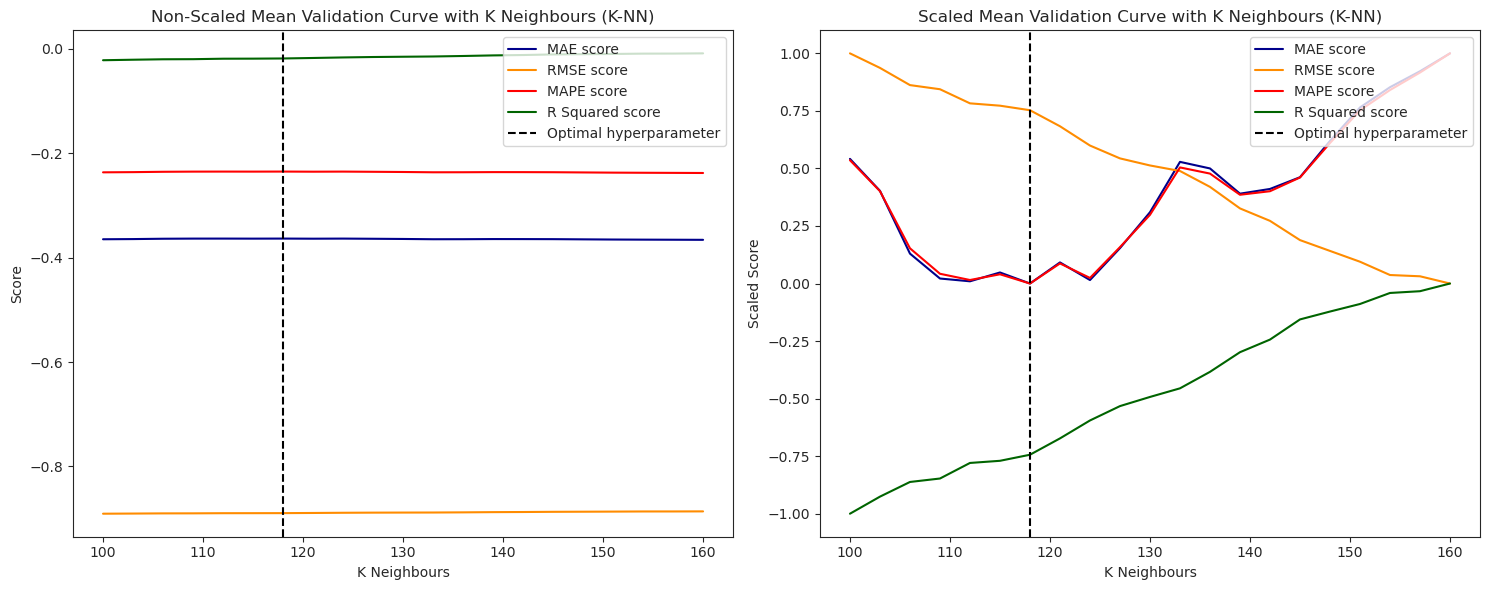

In [34]:
k = 118
df = -cv_results_df.select_dtypes(include=['int', 'float'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data for normalization
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Create subplots side by side
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot non-normalized data on the first subplot
#ax[0].plot(neighbors_range, -df["mean_test_score"], color='darkorange', label='RMSE score')
ax[0].plot(neighbors_range, -df["mean_test_neg_mean_absolute_error"], color='darkblue', label='MAE score')
ax[0].plot(neighbors_range, -df["mean_test_neg_root_mean_squared_error"], color='darkorange', label='RMSE score')
ax[0].plot(neighbors_range, -df["mean_test_neg_mean_absolute_percentage_error"], color='red', label='MAPE score')
ax[0].plot(neighbors_range, -df["mean_test_r2"], color='darkgreen', label='R Squared score')
ax[0].axvline(k, c='k', ls='--', label="Optimal hyperparameter")
ax[0].set_xlabel('K Neighbours')
ax[0].set_ylabel('Score')
ax[0].legend(loc="upper right")
ax[0].set_title("Non-Scaled Mean Validation Curve with K Neighbours (K-NN)")

# Plot normalized data on the second subplot
#ax[1].plot(neighbors_range, -normalized_df["mean_test_score"], color='darkorange', label='RMSE score')
ax[1].plot(neighbors_range, normalized_df["mean_test_neg_mean_absolute_error"], color='darkblue', label='MAE score')
ax[1].plot(neighbors_range, normalized_df["mean_test_neg_root_mean_squared_error"], color='darkorange', label='RMSE score')
ax[1].plot(neighbors_range, normalized_df["mean_test_neg_mean_absolute_percentage_error"], color='red', label='MAPE score')
ax[1].plot(neighbors_range, -normalized_df["mean_test_r2"], color='darkgreen', label='R Squared score')
ax[1].axvline(k, c='k', ls='--', label="Optimal hyperparameter")
ax[1].set_xlabel('K Neighbours')
ax[1].set_ylabel('Scaled Score')
ax[1].legend(loc="upper right")
ax[1].set_title("Scaled Mean Validation Curve with K Neighbours (K-NN)")

plt.tight_layout()
plt.show()

## Evaluation of Model (Testing Chosen model)

Now, we will use the test data namely X_test_meuse and y_test_meuse to evaluate the model's performance. We will evaluate on a few different scoring metrics for more comprehensive analysis between different spatial interpolation methods afterwards

### Performance Metrics of Model

We can include in the test score in the previous plot obtained to have an overall big picture.

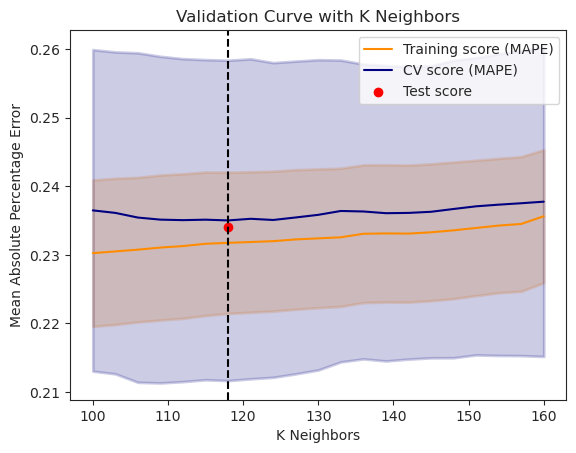

Testing Computation Time: 0.16 seconds


In [22]:
mean_train_score = -clf.cv_results_['mean_train_neg_mean_absolute_percentage_error']
mean_test_score = -clf.cv_results_['mean_test_neg_mean_absolute_percentage_error'] #this is the validation score 
std_train_score = clf.cv_results_['std_train_neg_mean_absolute_percentage_error']
std_test_score = clf.cv_results_['std_test_neg_mean_absolute_percentage_error']

plt.plot(neighbors_range, mean_train_score, color='darkorange', label='Training score (MAPE)')
plt.fill_between(
    neighbors_range,
    mean_train_score - std_train_score,
    mean_train_score + std_train_score,
    alpha=0.2,
    color="darkorange",
    lw=2,
)
plt.plot(neighbors_range, mean_test_score, color='navy', label='CV score (MAPE)')
plt.fill_between(
    neighbors_range,
    mean_test_score - std_test_score,
    mean_test_score + std_test_score,
    alpha=0.2,
    color="navy",
    lw=2,
)

start_time = time.time()
test_score = -clf.score(X_test_crimes, y_test_crimes)
end_time = time.time()

best_n = clf.best_params_['n_neighbors']
plt.axvline(best_n, c='k', ls='--')
plt.scatter(best_n, test_score, c='r', label='Test score')

plt.xlabel('K Neighbors')
plt.ylabel('Mean Absolute Percentage Error')
#plt.yscale('log')
plt.legend()
plt.title("Validation Curve with K Neighbors")
plt.show()

print(f"Testing Computation Time: {end_time - start_time:.2f} seconds")

We can also see how the model performs on the test set using the 2 other metrics RMSE and MAE.

In [23]:
y_pred_crimes = clf.best_estimator_.predict(X_test_crimes)
mae = mean_absolute_error(y_test_crimes, y_pred_crimes)
rmse = np.sqrt(mean_squared_error(y_test_crimes, y_pred_crimes))
r2 = r2_score(y_test_crimes, y_pred_crimes)
print("MAPE:", test_score)
print("MAE:", mae)
print("RMSE:", rmse)
print("R Squared:", r2)

MAPE: 0.23398922746595044
MAE: 0.3598101455351261
RMSE: 0.8905996565559036
R Squared: 0.06556603890409629


### Plotting Spatial Interpolation of entire area with Model

Now, we will plot the entire spatially interpolated values of the entire surface to analyze the spatial distribution. Previously, we have found the best hyperparameter configuration which is where number of neighbors = 5, thus we will refit the model with the entire dataset with this hyperparamater configuration to plot the entire area spatially interpolated.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor (Kneighbors package used)

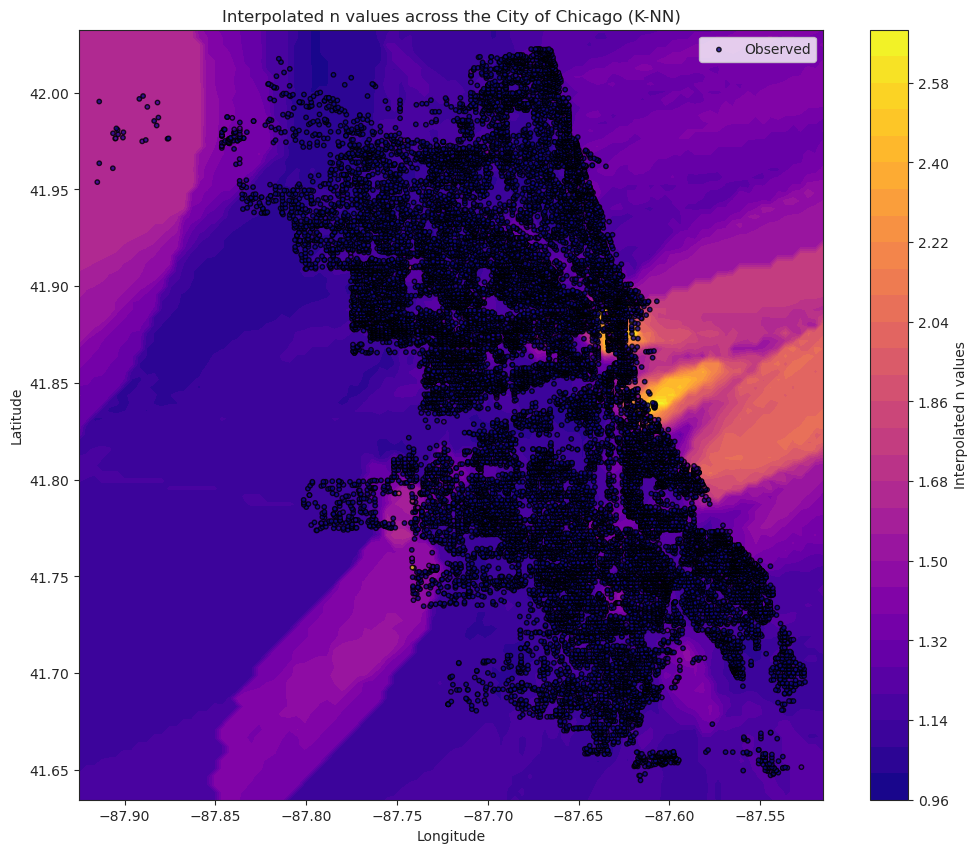

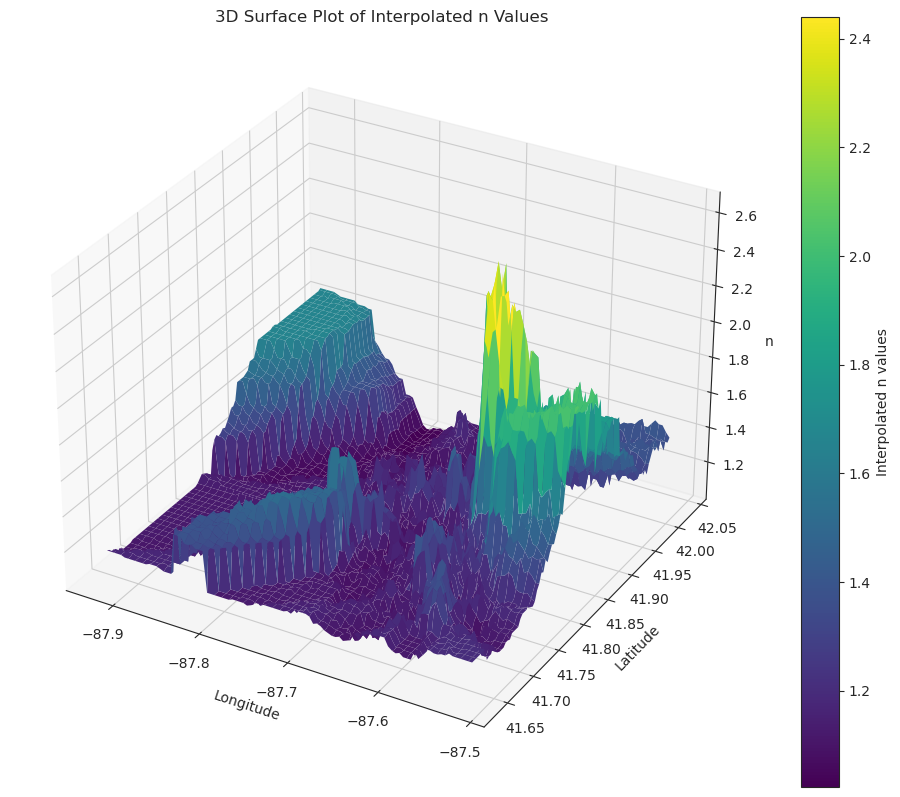

Spatial Interpolation Computation Time: 0.18 seconds


In [11]:
# Convert columns to numpy arrays
observed_location_columns = ['Longitude','Latitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Number of nearest neighbors to consider
n_neighbors = clf.best_params_['n_neighbors']

# Initialize NearestNeighbors model
nn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations,observed_values)  # Re-fit model using all data

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation


fig = plt.figure(figsize=(12, 10))

from mpl_toolkits.mplot3d import Axes3D

plt.contourf(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Longitude'], crimes_df['Latitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=10, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Interpolated n values across the City of Chicago (K-NN)')
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, label='Interpolated n values')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('n')
ax.set_title('3D Surface Plot of Interpolated n Values')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")

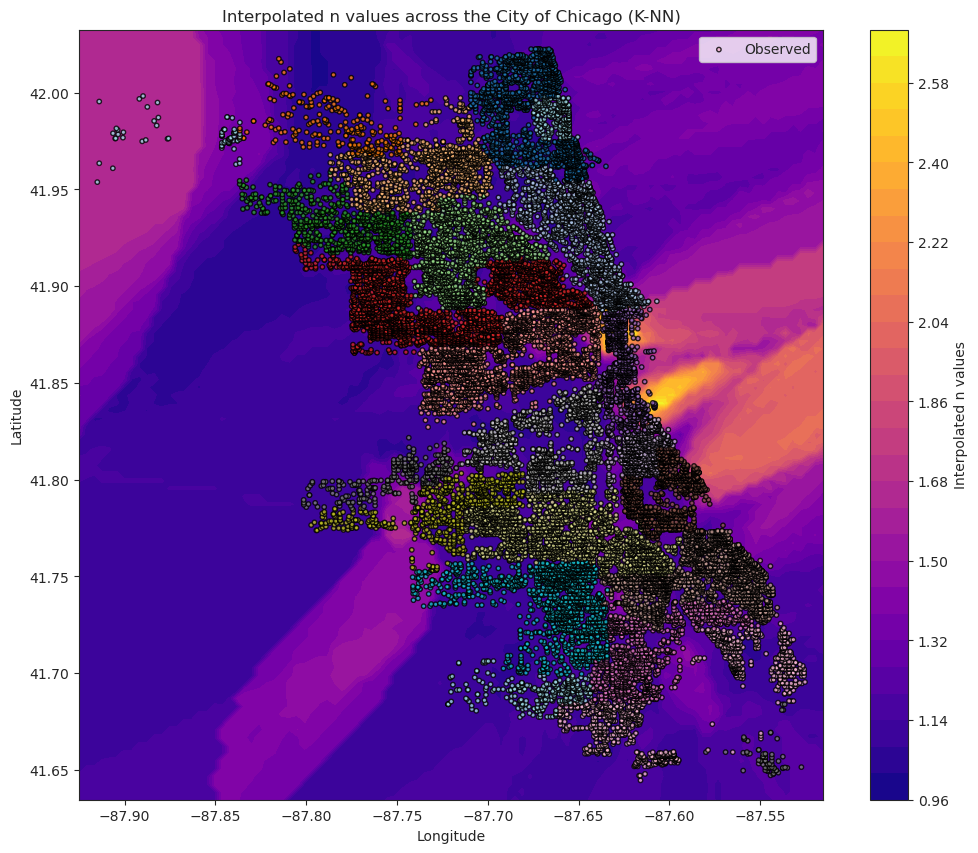

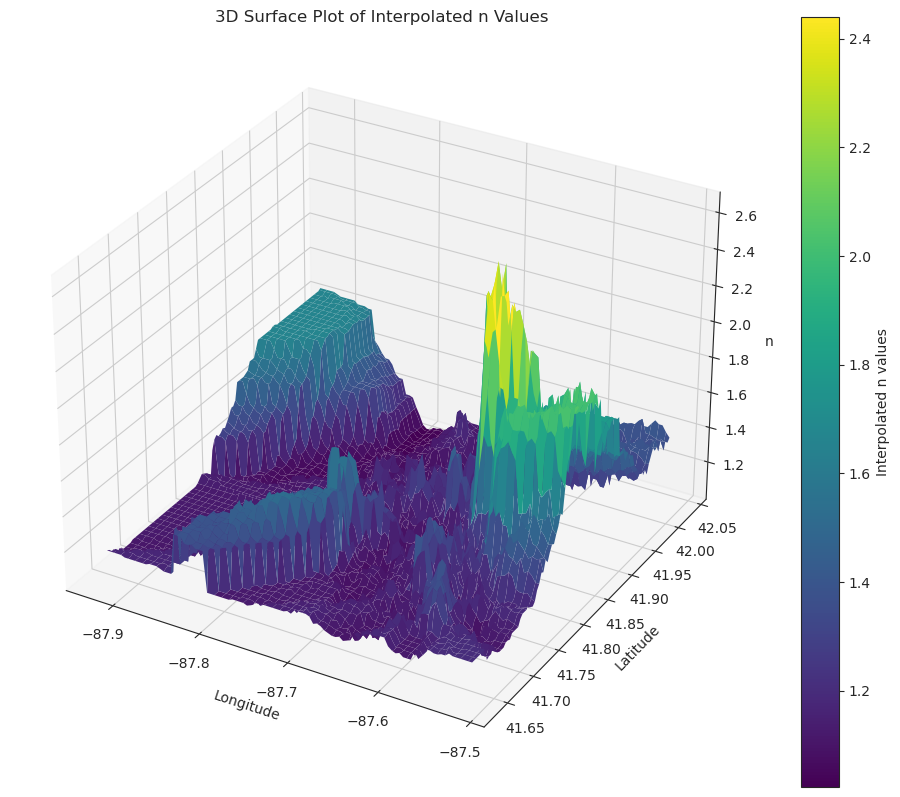

Spatial Interpolation Computation Time: 0.20 seconds


In [12]:
# Convert columns to numpy arrays
observed_location_columns = ['Longitude','Latitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Number of nearest neighbors to consider
n_neighbors = clf.best_params_['n_neighbors']

# Initialize NearestNeighbors model
nn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations,observed_values)  # Re-fit model using all data

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation


fig = plt.figure(figsize=(12, 10))

from mpl_toolkits.mplot3d import Axes3D

plt.contourf(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Longitude'], crimes_df['Latitude'], c=crimes_df['Community Area'], cmap='tab20', edgecolor='k', label='Observed', marker='o', s=10, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Interpolated n values across the City of Chicago (K-NN)')
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, label='Interpolated n values')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('n')
ax.set_title('3D Surface Plot of Interpolated n Values')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")

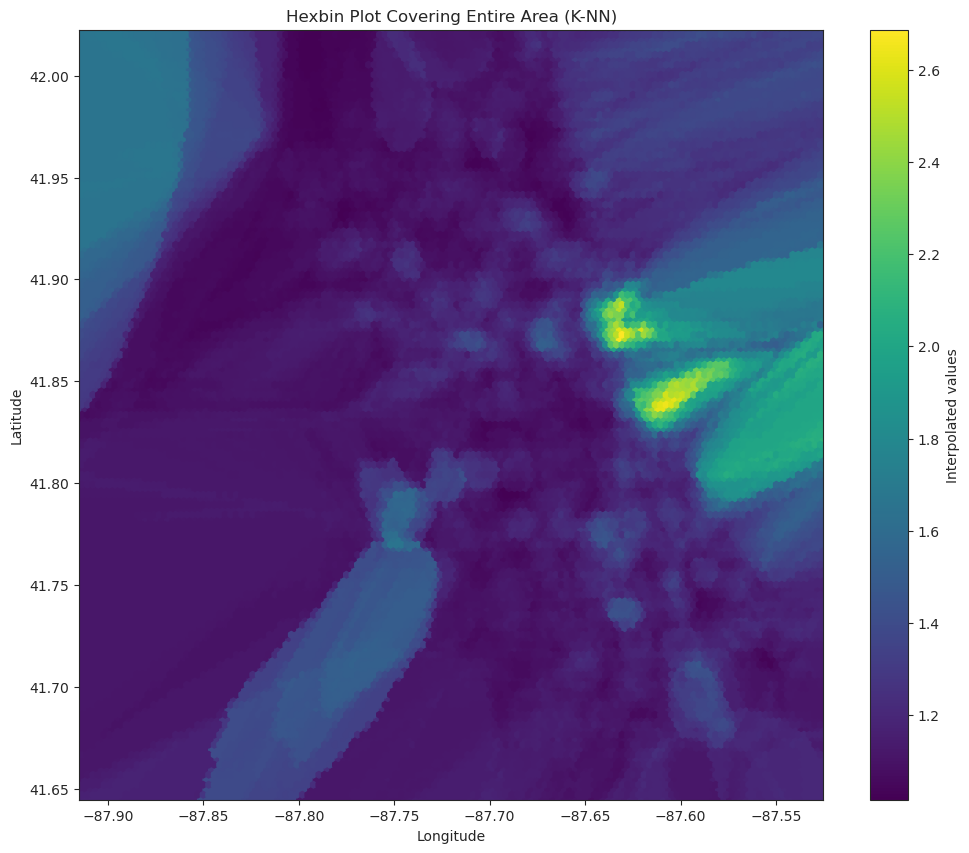

Spatial Interpolation Computation Time: 0.95 seconds


In [69]:
# Determine the minimum and maximum values for Latitude and Longitude
observed_location_columns_crimes = ['Longitude', 'Latitude']
observed_values_column_crimes = 'n'
observed_locations_crimes = crimes_df[observed_location_columns_crimes].values
observed_values_crimes = crimes_df[observed_values_column_crimes].values

lon_min, lon_max = observed_locations_crimes[:, 0].min(), observed_locations_crimes[:, 0].max()
lat_min, lat_max = observed_locations_crimes[:, 1].min(), observed_locations_crimes[:, 1].max()


# Generate a mesh grid of latitude and longitude values
grid_size = 200  # Square root of num_points, adjust as needed for resolution
longitude_range = np.linspace(lon_min, lon_max, grid_size)
latitude_range = np.linspace(lat_min, lat_max, grid_size)
lon_grid, lat_grid = np.meshgrid(longitude_range, latitude_range)  # Corrected order


# Flatten the grid to create combined array of [latitude, longitude] pairs
combined_array = np.column_stack((lon_grid.ravel(), lat_grid.ravel()))

# Hyperparamter tuned: Number of nearest neighbors to consider
n_neighbors = clf.best_params_['n_neighbors']

# Initialize NearestNeighbors model
nn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

nn_model.fit(observed_locations,observed_values)

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(combined_array)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Plot using hexbin
plt.figure(figsize=(12, 10))
hb = plt.hexbin(combined_array[:, 0], combined_array[:, 1], C=interpolated_values, gridsize=135, cmap='viridis', extent=(lon_min, lon_max, lat_min, lat_max))  # Corrected extent order
plt.colorbar(hb, label='Interpolated values')

plt.xlim(lon_min, lon_max)  # Corrected for longitude
plt.ylim(lat_min, lat_max)  # Corrected for latitude

plt.xlabel('Longitude')  # Corrected label
plt.ylabel('Latitude')  # Corrected label
plt.title('Hexbin Plot Covering Entire Area (K-NN)')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")

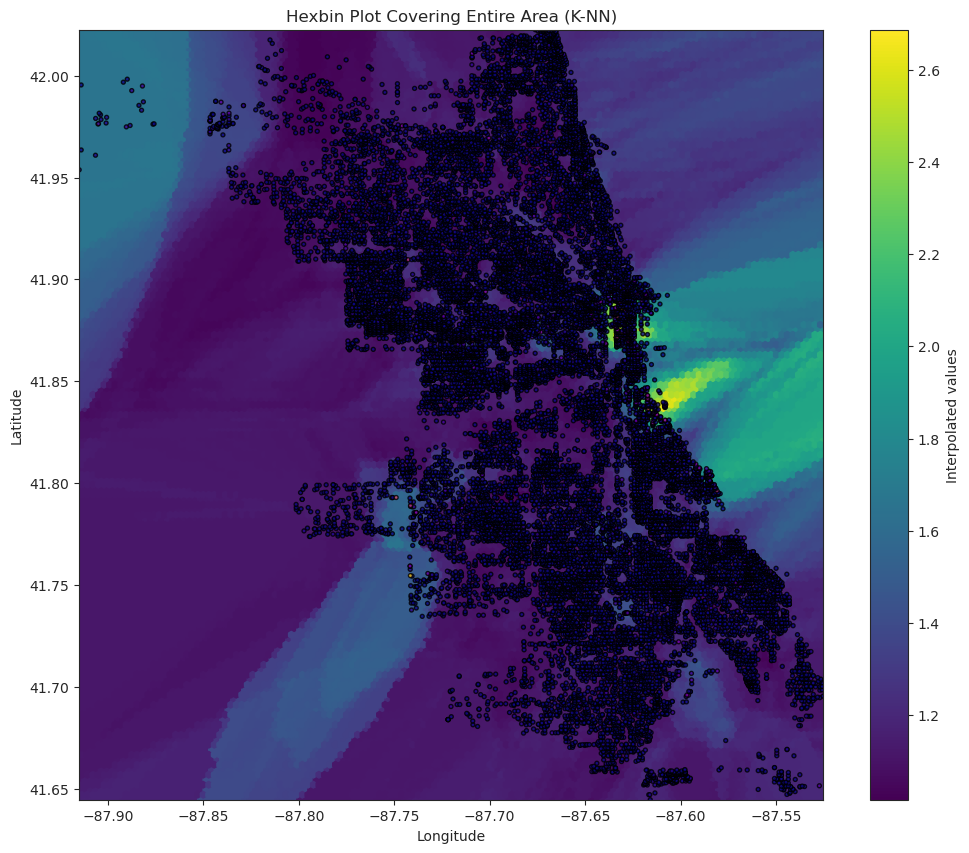

Spatial Interpolation Computation Time: 1.02 seconds


In [70]:
# Determine the minimum and maximum values for Latitude and Longitude
observed_location_columns_crimes = ['Longitude', 'Latitude']
observed_values_column_crimes = 'n'
observed_locations_crimes = crimes_df[observed_location_columns_crimes].values
observed_values_crimes = crimes_df[observed_values_column_crimes].values

lon_min, lon_max = observed_locations_crimes[:, 0].min(), observed_locations_crimes[:, 0].max()
lat_min, lat_max = observed_locations_crimes[:, 1].min(), observed_locations_crimes[:, 1].max()


# Generate a mesh grid of latitude and longitude values
grid_size = 200  # Square root of num_points, adjust as needed for resolution
longitude_range = np.linspace(lon_min, lon_max, grid_size)
latitude_range = np.linspace(lat_min, lat_max, grid_size)
lon_grid, lat_grid = np.meshgrid(longitude_range, latitude_range)  # Corrected order


# Flatten the grid to create combined array of [latitude, longitude] pairs
combined_array = np.column_stack((lon_grid.ravel(), lat_grid.ravel()))

# Hyperparamter tuned: Number of nearest neighbors to consider
n_neighbors = clf.best_params_['n_neighbors']

# Initialize NearestNeighbors model
nn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

nn_model.fit(observed_locations,observed_values)

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(combined_array)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Plot using hexbin
plt.figure(figsize=(12, 10))
hb = plt.hexbin(combined_array[:, 0], combined_array[:, 1], C=interpolated_values, gridsize=135, cmap='viridis', extent=(lon_min, lon_max, lat_min, lat_max))  # Corrected extent order
plt.scatter(crimes_df['Longitude'], crimes_df['Latitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s= 8, alpha=0.8)
plt.colorbar(hb, label='Interpolated values')

plt.xlim(lon_min, lon_max)  # Corrected for longitude
plt.ylim(lat_min, lat_max)  # Corrected for latitude

plt.xlabel('Longitude')  # Corrected label
plt.ylabel('Latitude')  # Corrected label
plt.title('Hexbin Plot Covering Entire Area (K-NN)')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")

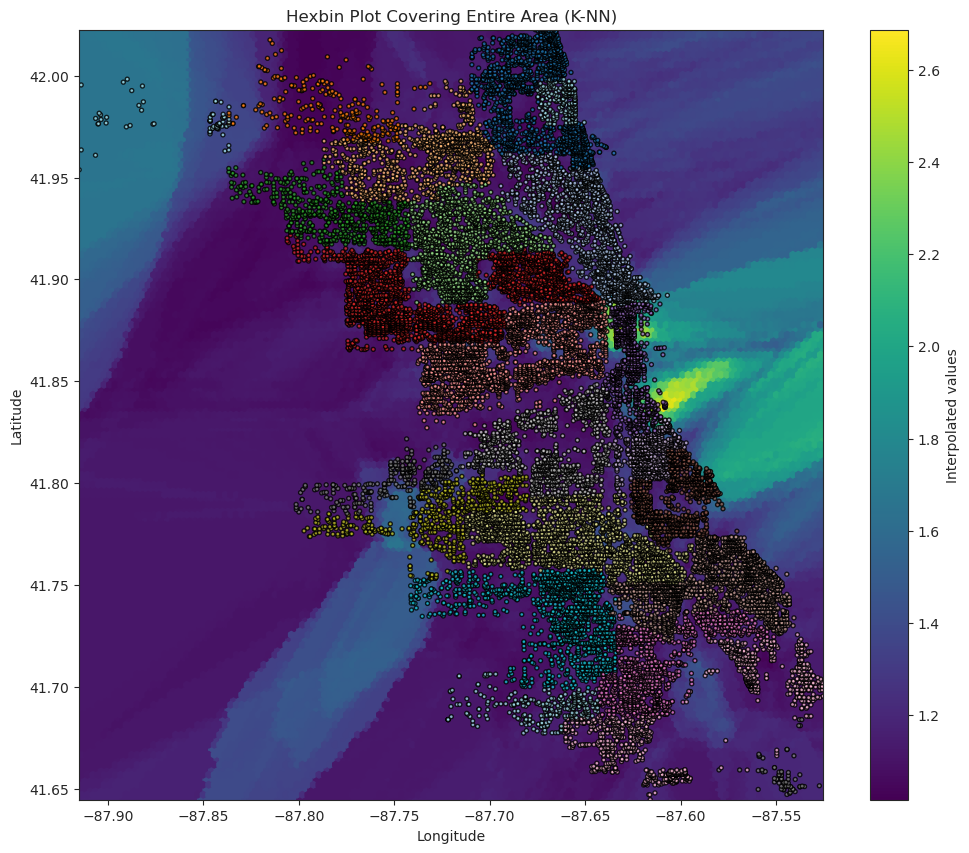

Spatial Interpolation Computation Time: 0.75 seconds


In [13]:
# Determine the minimum and maximum values for Latitude and Longitude
observed_location_columns_crimes = ['Longitude', 'Latitude']
observed_values_column_crimes = 'n'
observed_locations_crimes = crimes_df[observed_location_columns_crimes].values
observed_values_crimes = crimes_df[observed_values_column_crimes].values

lon_min, lon_max = observed_locations_crimes[:, 0].min(), observed_locations_crimes[:, 0].max()
lat_min, lat_max = observed_locations_crimes[:, 1].min(), observed_locations_crimes[:, 1].max()


# Generate a mesh grid of latitude and longitude values
grid_size = 200  # Square root of num_points, adjust as needed for resolution
longitude_range = np.linspace(lon_min, lon_max, grid_size)
latitude_range = np.linspace(lat_min, lat_max, grid_size)
lon_grid, lat_grid = np.meshgrid(longitude_range, latitude_range)  # Corrected order


# Flatten the grid to create combined array of [latitude, longitude] pairs
combined_array = np.column_stack((lon_grid.ravel(), lat_grid.ravel()))

# Hyperparamter tuned: Number of nearest neighbors to consider
n_neighbors = clf.best_params_['n_neighbors']

# Initialize NearestNeighbors model
nn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

nn_model.fit(observed_locations,observed_values)

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(combined_array)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Plot using hexbin
plt.figure(figsize=(12, 10))
hb = plt.hexbin(combined_array[:, 0], combined_array[:, 1], C=interpolated_values, gridsize=135, cmap='viridis', extent=(lon_min, lon_max, lat_min, lat_max))  # Corrected extent order
plt.scatter(crimes_df['Longitude'], crimes_df['Latitude'],c=crimes_df['Community Area'], cmap='tab20', edgecolor='k', label='Observed', marker='o', s= 8, alpha=0.8)
plt.colorbar(hb, label='Interpolated values')

plt.xlim(lon_min, lon_max)  # Corrected for longitude
plt.ylim(lat_min, lat_max)  # Corrected for latitude

plt.xlabel('Longitude')  # Corrected label
plt.ylabel('Latitude')  # Corrected label
plt.title('Hexbin Plot Covering Entire Area (K-NN)')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")

# Overfitting Analysis

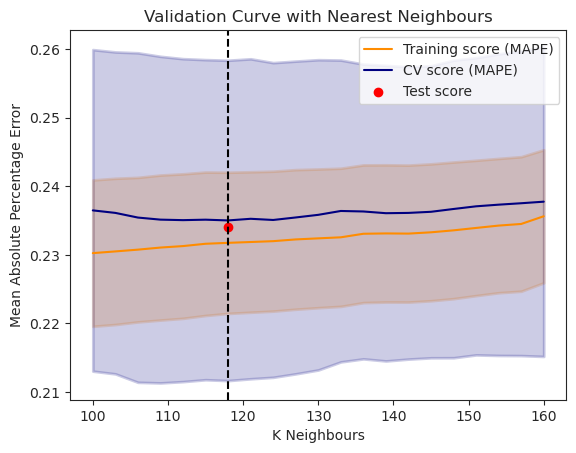

In [67]:
mean_train_score = -clf.cv_results_['mean_train_neg_mean_absolute_percentage_error']
mean_test_score = -clf.cv_results_['mean_test_neg_mean_absolute_percentage_error'] #this is the validation score 
std_train_score = clf.cv_results_['std_train_neg_mean_absolute_percentage_error']
std_test_score = clf.cv_results_['std_test_neg_mean_absolute_percentage_error']

plt.plot(neighbors_range, mean_train_score, color='darkorange', label='Training score (MAPE)')
plt.fill_between(
    neighbors_range,
    mean_train_score - std_train_score,
    mean_train_score + std_train_score,
    alpha=0.2,
    color="darkorange",
    lw=2,
)
plt.plot(neighbors_range, mean_test_score, color='navy', label='CV score (MAPE)')
plt.fill_between(
    neighbors_range,
    mean_test_score - std_test_score,
    mean_test_score + std_test_score,
    alpha=0.2,
    color="navy",
    lw=2,
)

best_n = clf.best_params_['n_neighbors']
plt.axvline(best_n, c='k', ls='--')
plt.scatter(best_n, test_score, c='r', label='Test score')

plt.xlabel('K Neighbours')
plt.ylabel('Mean Absolute Percentage Error')
#plt.yscale('log')
plt.legend()
plt.title("Validation Curve with Nearest Neighbours")
plt.show()

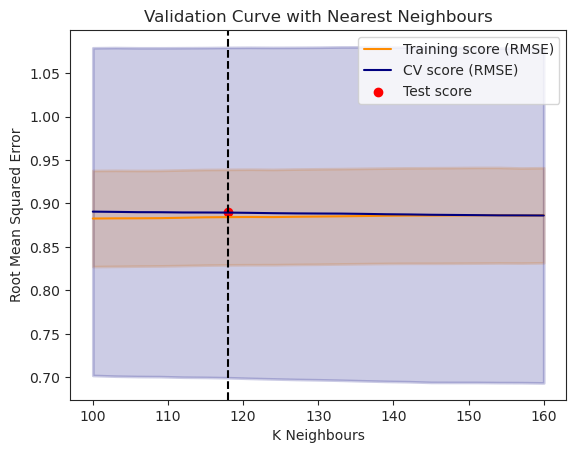

In [66]:
mean_train_score = -clf.cv_results_['mean_train_neg_root_mean_squared_error']
mean_test_score = -clf.cv_results_['mean_test_neg_root_mean_squared_error'] #this is the validation score 
std_train_score = clf.cv_results_['std_train_neg_root_mean_squared_error']
std_test_score = clf.cv_results_['std_test_neg_root_mean_squared_error']

plt.plot(neighbors_range, mean_train_score, color='darkorange', label='Training score (RMSE)')
plt.fill_between(
    neighbors_range,
    mean_train_score - std_train_score,
    mean_train_score + std_train_score,
    alpha=0.2,
    color="darkorange",
    lw=2,
)
plt.plot(neighbors_range, mean_test_score, color='navy', label='CV score (RMSE)')
plt.fill_between(
    neighbors_range,
    mean_test_score - std_test_score,
    mean_test_score + std_test_score,
    alpha=0.2,
    color="navy",
    lw=2,
)


best_n = clf.best_params_['n_neighbors']
plt.axvline(best_n, c='k', ls='--')
plt.scatter(best_n, rmse, c='r', label='Test score')

plt.xlabel('K Neighbours')
plt.ylabel('Root Mean Squared Error')
#plt.yscale('log')
plt.legend()
plt.title("Validation Curve with Nearest Neighbours")
plt.show()

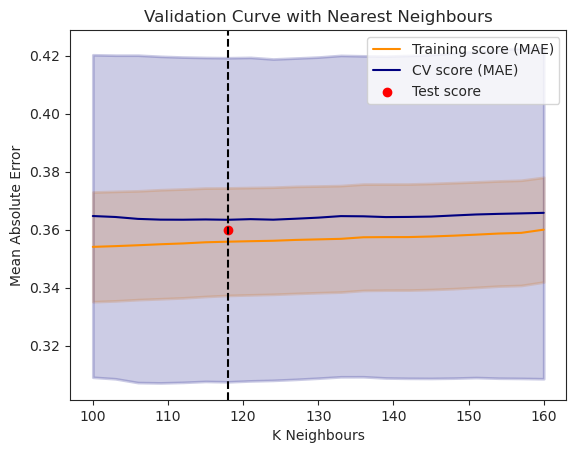

In [65]:
mean_train_score = -clf.cv_results_['mean_train_neg_mean_absolute_error']
mean_test_score = -clf.cv_results_['mean_test_neg_mean_absolute_error'] #this is the validation score 
std_train_score = clf.cv_results_['std_train_neg_mean_absolute_error']
std_test_score = clf.cv_results_['std_test_neg_mean_absolute_error']

plt.plot(neighbors_range, mean_train_score, color='darkorange', label='Training score (MAE)')
plt.fill_between(
    neighbors_range,
    mean_train_score - std_train_score,
    mean_train_score + std_train_score,
    alpha=0.2,
    color="darkorange",
    lw=2,
)
plt.plot(neighbors_range, mean_test_score, color='navy', label='CV score (MAE)')
plt.fill_between(
    neighbors_range,
    mean_test_score - std_test_score,
    mean_test_score + std_test_score,
    alpha=0.2,
    color="navy",
    lw=2,
)

best_n = clf.best_params_['n_neighbors']
plt.axvline(best_n, c='k', ls='--')
plt.scatter(best_n, mae, c='r', label='Test score')

plt.xlabel('K Neighbours')
plt.ylabel('Mean Absolute Error')
#plt.yscale('log')
plt.legend()
plt.title("Validation Curve with Nearest Neighbours")
plt.show()

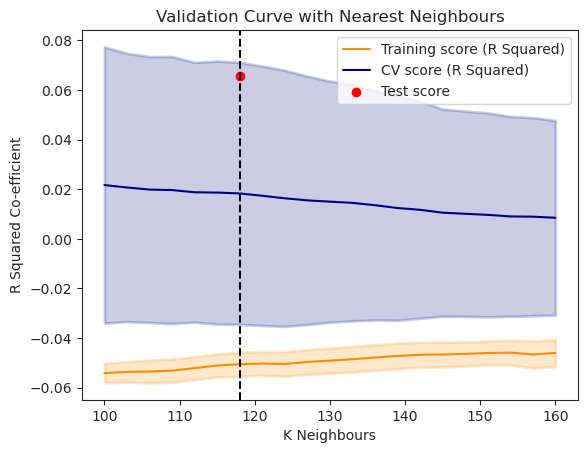

In [64]:
mean_train_score = -clf.cv_results_['mean_train_r2']
mean_test_score = -clf.cv_results_['mean_test_r2'] #this is the validation score 
std_train_score = clf.cv_results_['std_train_r2']
std_test_score = clf.cv_results_['std_test_r2']

plt.plot(neighbors_range, mean_train_score, color='darkorange', label='Training score (R Squared)')
plt.fill_between(
    neighbors_range,
    mean_train_score - std_train_score,
    mean_train_score + std_train_score,
    alpha=0.2,
    color="darkorange",
    lw=2,
)
plt.plot(neighbors_range, mean_test_score, color='navy', label='CV score (R Squared)')
plt.fill_between(
    neighbors_range,
    mean_test_score - std_test_score,
    mean_test_score + std_test_score,
    alpha=0.2,
    color="navy",
    lw=2,
)

best_n = clf.best_params_['n_neighbors']
plt.axvline(best_n, c='k', ls='--')
plt.scatter(best_n, r2, c='r', label='Test score')

plt.xlabel('K Neighbours')
plt.ylabel('R Squared Co-efficient')
#plt.yscale('log')
plt.legend()
plt.title("Validation Curve with Nearest Neighbours")
plt.show()